In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

def plainReverberator(inputSignal, delay, filterParam):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = (delay-filterParam)*inputSignal[n-delay] + filterParam*outputSignal[n-delay]
    return outputSignal



In [78]:
def plainGainFromReverbTime(reverbTime, plainDelay, samplingFreq):
    nDelays = np.size(plainDelay)
    plainGains = np.zeros(nDelays)
    for ii in np.arange(nDelays):
        plainGains[ii] = 10**(-3*plainDelays[ii]/(reverbTime*samplingFreq))
    return plainGains

In [79]:
def allpassReverberator(inputSignal, delay, apParameter):
    nData = np.size(inputSignal)
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            outputSignal[n] = inputSignal[n]
        else:
            outputSignal[n] = apParameter*inputSignal[n] + inputSignal[n-delay] - \
                apParameter*outputSignal[n-delay]
    return outputSignal

In [80]:
def moorerReverb(inputSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams):
    nData = np.size(inputSignal)
    tmpSignal = np.zeros(nData)
    # run the plain reverberators in parallel
    nPlainReverberators = np.size(plainDelays)
    for ii in np.arange(nPlainReverberators):
        tmpSignal = tmpSignal + \
            mixingParams[ii]*plainReverberator(inputSignal, plainDelays[ii], plainGains[ii])
    # run the allpass reverberators in series
    nAllpassReverberators = np.size(allpassDelays)
    for ii in np.arange(nAllpassReverberators):
        tmpSignal = allpassReverberator(tmpSignal, allpassDelays[ii], apParams[ii])
    return tmpSignal

In [81]:
samplingFreq, guitarSignal = wave.read('data/guitar.wav')
guitarSignal = guitarSignal/2**15 # normalise
ipd.Audio(guitarSignal, rate=samplingFreq) 

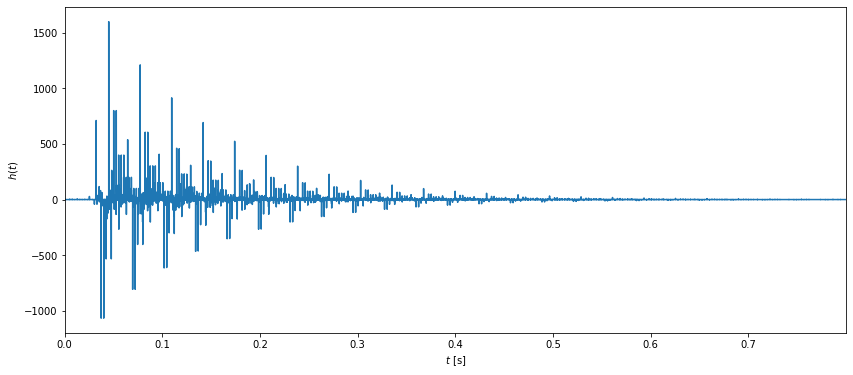

In [88]:
mixingParams = np.array([0.3, 0.2, 0.1, 0,2, 0.1, 0,1])
plainDelays = np.array([1557, 1617, 1491, 1356, 1422, 1116])
allpassDelays = np.array([225, 341])
apParams = np.array([-0.5, -0.5])
reverbTime = 0.8 # seconds
plainGains = plainGainFromReverbTime(reverbTime, plainDelays, samplingFreq)
# compute the impulse response of the room
irLength = np.int(np.floor(reverbTime*samplingFreq))
impulse = np.r_[np.array([1]),np.zeros(irLength-1)]
impulseResponse = guitarSignalWithReverb = \
    moorerReverb(impulse, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
plt.figure(figsize=(14,6))
plt.plot(np.arange(irLength)/samplingFreq, impulseResponse)
plt.xlabel('$t$ [s]'),plt.ylabel('$h(t)$'),plt.xlim((0,(irLength-1)/samplingFreq));

##### guitarSignalWithReverb = \
    moorerReverb(guitarSignal, mixingParams, plainDelays, plainGains, allpassDelays, apParams)
ipd.Audio(guitarSignalWithReverb, rate=samplingFreq)